# Sales Funnel Analysis using Classification and Clustering

#### Name      : Rofin Andonissamy


In [123]:
#import Libraries
#----------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# Read the dataset from input files
#### Read the user data from input file

In [124]:
#---Read the user data from input file
#-------------------------------------
user_df = pd.read_csv('user_table.csv',parse_dates=True)
#---Display top 5 records from the table to perceive the data
user_df.head(5)

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


#### Read the "Home Page Visit" details from input file

In [125]:
#---Read the home page visit data from input file
#------------------------------------------------
homepg_df = pd.read_csv('home_page_table.csv')
#---Display top 5 records from the table to perceive the data
print(homepg_df.shape)
homepg_df.head(5)

(90400, 2)


,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


#### Read the "Search Page Visit" details from input file

In [126]:
#---Read the home search visit data from input file
srchpg_df = pd.read_csv('search_page_table.csv')
#---Display top 5 records from the table to perceive the data
print(srchpg_df.shape)
srchpg_df.head(5)

(45200, 2)


,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


#### Read the "Payment Page Visit" details from input file

In [127]:
#---Read the payment page visit data from input file
paymtpg_df = pd.read_csv('payment_page_table.csv')
#---Display top 5 records from the table to perceive the data
print(paymtpg_df.shape)
paymtpg_df.head(5)

(6030, 2)


,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


#### Read the "Payment Confirmation Page Visit" details from input file

In [128]:
#---Read the payment confirmation page visit data from input file
paymtcnf_df = pd.read_csv('payment_confirmation_table.csv')
#---Display top 5 records from the table to perceive the data
print(paymtcnf_df.shape)
paymtcnf_df.head(5)

(452, 2)


,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


# Exploratory Analysis
####  Number of home page hits


In [129]:
homepg_agg = homepg_df.groupby('user_id',as_index=False).agg({"page":"count"})
home_visit =homepg_agg.page.sum()
print("Number of home page hits:",home_visit)
homepg_agg.head(5)

Number of home page hits: 90400


,user_id,page
0,17,1
1,28,1
2,37,1
3,38,1
4,55,1


####  Number of Search page hits

In [130]:
srch_agg = srchpg_df.groupby('user_id',as_index=False).agg({"page":"count"})
srch_visit =srch_agg.page.sum()
print("Number of search page hits:",srch_visit)
srch_agg.head(5)

Number of search page hits: 45200


,user_id,page
0,17,1
1,37,1
2,38,1
3,210,1
4,214,1


####  Number of Payment page hits

In [131]:
paymt_agg = paymtpg_df.groupby('user_id',as_index=False).agg({"page":"count"})
paymt_visit =paymt_agg.page.sum()
print("Number of payment page hits:",paymt_visit)
paymt_agg.head(5)

Number of payment page hits: 6030


,user_id,page
0,38,1
1,459,1
2,677,1
3,1549,1
4,1728,1


####  Number of Payment confirmation page hits
<u>452 users converted after hitting the homepage</u>

In [132]:
paymtcnf_agg = paymtcnf_df.groupby('user_id',as_index=False).agg({"page":"count"})
paymtcnf_visit =paymtcnf_agg.page.sum()
print("Number of payment confirmation page hits:",paymtcnf_visit)
paymtcnf_agg.head(5)

Number of payment confirmation page hits: 452


,user_id,page
0,4561,1
1,9477,1
2,13830,1
3,14647,1
4,18898,1


# Distribution of users across pages

,Page,visit
Page,,
Paymentconfirmationpage_Visit,Paymentconfirmationpage_Visit,452
Paymentpage_Visit,Paymentpage_Visit,6030
Searchpage_Visit,Searchpage_Visit,45200
Homepage_Visit,Homepage_Visit,90400


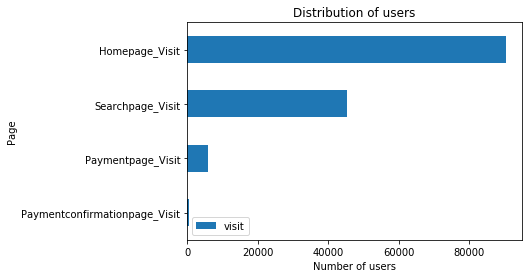

In [214]:
sls_funnel = pd.DataFrame()
title = ("Paymentconfirmationpage_Visit","Paymentpage_Visit","Searchpage_Visit","Homepage_Visit")
value = (paymtcnf_visit,paymt_visit,srch_visit,home_visit)
sls_funnel['Page'] = title
sls_funnel['visit'] = value
sls_funnel.index = sls_funnel.Page
sls_funnel.plot.barh()
plt.title("Distribution of users")
plt.xlabel("Number of users")
sls_funnel

#### Checking for missing data
 Observation: No missing data found

In [179]:
print("*"*90)
print("Home page aggregate details")
print("*"*90)
print(homepg_agg.info())
print(homepg_agg.isna().sum())
print("*"*90)
print("Search page aggregate details")
print("*"*90)
print(srch_agg.info())
print(srch_agg.isna().sum())
print("*"*90)
print("Payment page aggregate details")
print("*"*90)
print(paymt_agg.info())
print(paymt_agg.isna().sum())
print("*"*90)
print("Payment confirmation page aggregate details")
print("*"*90)
print(paymtcnf_agg.info())
print(paymtcnf_agg.isna().sum())

******************************************************************************************
Home page aggregate details
******************************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 2 columns):
user_id    90400 non-null int64
homepg     90400 non-null int64
dtypes: int64(2)
memory usage: 2.1 MB
None
user_id    0
homepg     0
dtype: int64
******************************************************************************************
Search page aggregate details
******************************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45200 entries, 0 to 45199
Data columns (total 2 columns):
user_id    45200 non-null int64
srchpg     45200 non-null int64
dtypes: int64(2)
memory usage: 1.0 MB
None
user_id    0
srchpg     0
dtype: int64
**********************************************************************

# Data Wrangling

In [180]:
#-- Rename the the column name in aggregation so that it can be merged together
#------------------------------------------------------------------------------
homepg_agg.columns = ['user_id','homepg']
srch_agg.columns = ['user_id','srchpg']
paymt_agg.columns = ['user_id','paymtpg']
paymtcnf_agg.columns = ['user_id','paymtcnf']

#-- Encode the page visit as 1
#-----------------------------
homepg_agg['homepg']=1
srch_agg['srchpg']=1
paymt_agg['paymtpg']=1
paymtcnf_agg['paymtcnf']=1


#### Merge the details together for further analysis

In [181]:
#-- Outer join the aggregate details of page visit with user details for further analysis
#----------------------------------------------------------------------------------------
conv_df = pd.merge(user_df,homepg_agg, how='outer',on='user_id')
conv_df = pd.merge(conv_df,srch_agg,how='outer', on='user_id',)
conv_df = pd.merge(conv_df,paymt_agg,how='outer', on='user_id')
conv_df = pd.merge(conv_df,paymtcnf_agg,how='outer', on='user_id')

conv_df.head()

,user_id,date,device,sex,homepg,srchpg,paymtpg,paymtcnf
0,450007,2015-02-28,Desktop,Female,1,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,1,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,1,1.0,NaN,NaN
3,190794,2015-02-18,Desktop,Female,1,1.0,NaN,NaN
4,537909,2015-01-15,Desktop,Male,1,NaN,NaN,NaN


 #### Treat the missing data

In [182]:
conv_df = conv_df.fillna(0)

#---Cast the categorical values as integer
#----------------------------------------
conv_df['homepg'] = conv_df['homepg'].astype(int)
conv_df['srchpg'] = conv_df['srchpg'].astype(int)
conv_df['paymtpg'] = conv_df['paymtpg'].astype(int)
conv_df['paymtcnf'] = conv_df['paymtcnf'].astype(int)

print("The final shape of result:",conv_df.shape)
print("*"*90)
print("Validate that there are no null values")
print("*"*90)
print(conv_df.isnull().sum())
conv_df.head(10)

The final shape of result: (90400, 8)
******************************************************************************************
Validate that there are no null values
******************************************************************************************
user_id     0
date        0
device      0
sex         0
homepg      0
srchpg      0
paymtpg     0
paymtcnf    0
dtype: int64


,user_id,date,device,sex,homepg,srchpg,paymtpg,paymtcnf
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0
5,993454,2015-03-03,Desktop,Male,1,0,0,0
6,377150,2015-04-15,Desktop,Female,1,1,0,0
7,137258,2015-01-27,Mobile,Male,1,0,0,0
8,608249,2015-04-12,Desktop,Female,1,0,0,0
9,615615,2015-02-24,Mobile,Female,1,1,0,0




# Univariate Analysis
#### Device Usage Pattern
Observation : More users access the website using desktop 
Inference: Mobile Website experience should be studied for any possible improvements to attract more adoption  

Desktop    60200
Mobile     30200
Name: device, dtype: int64

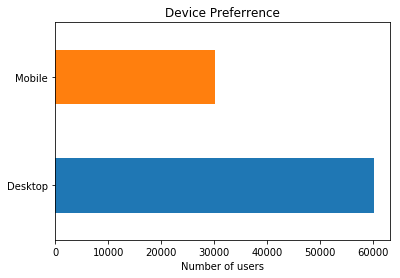

In [183]:
#---Spread of devices
#--------------------
dev = []
dev = conv_df['device'].value_counts()
dev.plot.barh()
plt.title("Device Preferrence")
plt.xlabel("Number of users")
dev

#### Gender Distribution
Observation: Distribution seems almost even.

Male      45325
Female    45075
Name: sex, dtype: int64

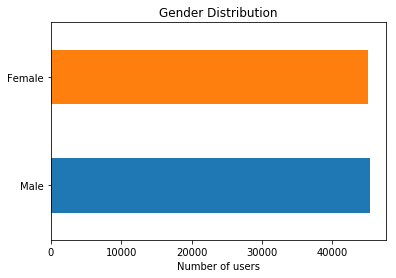

In [184]:
#---Spread of gender
#-------------------
sex = []
sex = conv_df['sex'].value_counts()
sex.plot.barh()
plt.title('Gender Distribution')
plt.xlabel('Number of users')
sex

#### Distribution by Date
Observation: Data is spread around four months : January, February, March, and April of 2015

In [185]:
print("The earliest date :",conv_df['date'].min()) 
print("The latest date :",conv_df['date'].max())


The earliest date : 2015-01-01
The latest date : 2015-04-30


# Bivariate Analysis
#### Conversion Achieved in Various months 
Observation: Conversion rate seems to decline over subsequent months<br>
<u>Maximum conversion was achieved in January </u>

01-15    189
02-15    173
04-15     46
03-15     44
Name: month, dtype: int64

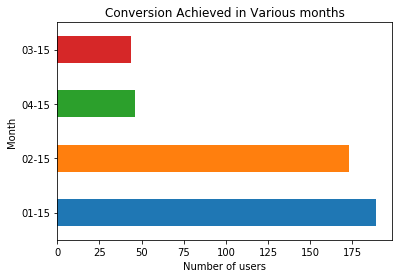

In [193]:
dates = conv_df.loc[conv_df['paymtcnf']==1].copy('deep')
dates['month']= pd.to_datetime(dates['date']).dt.strftime('%m-%y')

paymtcnf = []
paymtcnf = dates['month'].value_counts()

paymtcnf.plot.barh()
plt.title("Conversion Achieved in Various months")
plt.ylabel("Month")
plt.xlabel("Number of users")
paymtcnf



#### Distribution of users abondoned at payment page
<b>Observation:</b> There is a steady decrease in the number of users droping out at payment page. 
<br>
<b>Inference:</b> Further studies could be conducted on various aspects like payment failures to find out possible scope of increasing customer retention

02-15    2239
01-15    2201
03-15     587
04-15     551
Name: month, dtype: int64

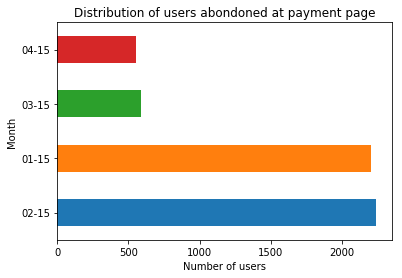

In [194]:
date_srch = conv_df.loc[(conv_df['paymtcnf']==0) & (conv_df['paymtpg']==1)].copy('deep')

date_srch['month']= pd.to_datetime(date_srch['date']).dt.strftime('%m-%y')

payfail = []

payfail = date_srch['month'].value_counts()

payfail.plot.barh()
plt.title("Distribution of users abondoned at payment page")
plt.ylabel("Month")
plt.xlabel("Number of users")
payfail

#### Distribution of users abondoned the website at HomePage
<b>Observation:</b>There is a steady increase in the number of users abondoning the website at homepage
<br>
<b>Inference:</b>Homepage could be studied further for possible improvements and scope for making it more user friendly

03-15    13721
04-15    13520
01-15     9046
02-15     8913
Name: month, dtype: int64

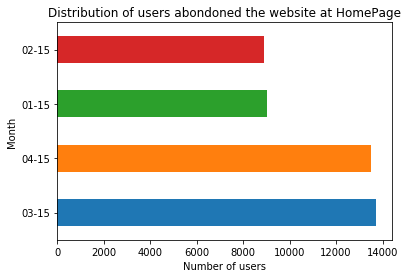

In [195]:
home_fail = conv_df.loc[(conv_df['srchpg']==0) & (conv_df['homepg']==1)].copy('deep')

home_fail['month']= pd.to_datetime(home_fail['date']).dt.strftime('%m-%y')
homefail = []
homefail = home_fail['month'].value_counts()

homefail.plot.barh()
plt.title("Distribution of users abondoned the website at HomePage")
plt.ylabel("Month")
plt.xlabel("Number of users")
homefail

#### Distribution of users abondoned the website at Search
<b>Observation:</b>There is some decline in the number of users abondoning the website at searchpage.However, there are significan number of users abondoning the website at searchpage
<br>
<b>Inference:</b>Further study should be conducted to determine scope of improvment in search module or possibility to increase the product variety listed in website 

02-15    11275
01-15    11164
04-15     8483
03-15     8248
Name: month, dtype: int64

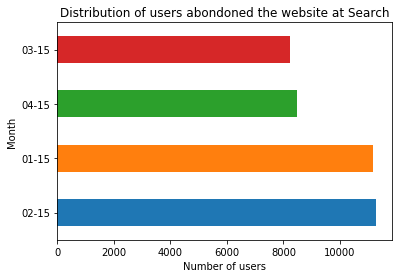

In [196]:
home_srch = conv_df.loc[(conv_df['srchpg']==1) & (conv_df['paymtpg']==0)].copy('deep')

home_srch['month']= pd.to_datetime(home_srch['date']).dt.strftime('%m-%y')

srchfail = []

srchfail = home_srch['month'].value_counts()

srchfail.plot.barh()
plt.title("Distribution of users abondoned the website at Search")
plt.ylabel("Month")
plt.xlabel("Number of users")
srchfail

#### Distribution of conversion rate by gender
Observation: It seems to be almost even

Female    2859
Male      2719
Name: sex, dtype: int64

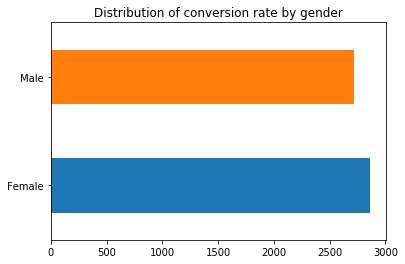

In [198]:
gender = conv_df.loc[(conv_df['paymtcnf']==1)].copy('deep')

gender['month']= pd.to_datetime(gender['date']).dt.strftime('%m-%y')

conv_suceed= []

conv_suceed = date_srch['sex'].value_counts()

conv_suceed.plot.barh()
plt.title("Distribution of conversion rate by gender")

conv_suceed

#### Distribution of abadonment at search page by gender
<b>Observation:</b> It seems to be almost even

Male      19594
Female    19576
Name: sex, dtype: int64

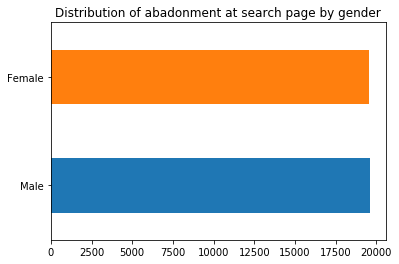

In [199]:
gender_srfail = conv_df.loc[(conv_df['srchpg']==1) & (conv_df['paymtpg']==0)].copy('deep')
count= []
count = gender_srfail['sex'].value_counts()

count.plot.barh()
plt.title("Distribution of abadonment at search page by gender")
count

#### Encode categorical Values

In [200]:
#--- Encode categorical values
#-----------------------------

#---Make a deep copy of the existing table and preserve the existing table 
final_df = conv_df.copy('deep')
final_df['homepg'] = final_df['homepg'].astype(int)
#---Encode device
final_df['device'] =  le().fit_transform(final_df['device']) #(Desktop - 0, Mobile - 1)
#---Encode sex
final_df['sex']    =  le().fit_transform(final_df['sex']) #(Female - 0, Male - 1)

#----Extract month
final_df['date']  = pd.to_datetime(final_df['date']).dt.month
final_df.rename(columns={ final_df.columns[1]: "month" },inplace=True)
#dummies_df = pd.get_dummies(final_df['month'], prefix='month_', drop_first = False)
#final_df = pd.concat([final_df, dummies_df], axis = 1)



final_df.head()


,user_id,month,device,sex,homepg,srchpg,paymtpg,paymtcnf
0,450007,2,0,0,1,0,0,0
1,756838,1,0,1,1,0,0,0
2,568983,4,0,1,1,1,0,0
3,190794,2,0,0,1,1,0,0
4,537909,1,0,1,1,0,0,0


# Correlation Matrix
From the following table we can see the correlation of each feature to the output variable.
<br><b>Month</b> Has weak negative correlation to the output variables
<br><b>Device</b> has moderate positive correlation to the output variables.<br>
<b>Sex</b> has relatively lesser negative correlation to the the output variables.<br>
<b>Homepage</b> does not have any correlation and is an independant variable (no variance in this data, hence standard deviation will be zero and so not possible to calculate correlation)<br>
<b>Search page</b> has relatively significant positive correlation to the output vairable<br>
<b>Payment page </b> seems to have strong positive correlation to the output variables<br>





In [201]:
#---Correlation matrix
#----------------------
correlation = final_df.iloc[:,1:].corr()
correlation.drop(correlation.columns[0:-3],axis = 1,inplace = True)
correlation



,srchpg,paymtpg,paymtcnf
month,-1.803696e-01,-0.141963,-0.039137
device,6.447022e-18,0.094519,0.050209
sex,-6.128342e-03,-0.008276,-0.004901
homepg,NaN,NaN,NaN
srchpg,1.000000e+00,0.267340,0.070888
paymtpg,2.673404e-01,1.000000,0.265161
paymtcnf,7.088812e-02,0.265161,1.000000


# Prepare the features and labels for training

In [202]:
#---Data required to develop prediction model for searchpage conversion
pymtpg_pred = final_df[final_df['srchpg']==1].copy('deep')
#---Data required to develop prediction model for Paymentpage conversion
pymtcnf_pred = final_df[final_df['paymtpg']==1].copy('deep')


In [203]:
#---Searchpage prediction features and labels
srchpg_X = final_df[final_df.columns[1:4]]
srchpg_Y = final_df['srchpg']
print('labels:')
print(srchpg_Y.head())
print('Features:')
srchpg_X.head()



labels:
0    0
1    0
2    1
3    1
4    0
Name: srchpg, dtype: int32
Features:


,month,device,sex
0,2,0,0
1,1,0,1
2,4,0,1
3,2,0,0
4,1,0,1


In [204]:
paymnt_X = pymtpg_pred[pymtpg_pred.columns[1:4]]
paymnt_Y = pymtpg_pred['paymtpg']
print('labels:')
print(paymnt_Y.head())
print('Features:')
paymnt_X.head()

labels:
2     0
3     0
6     0
9     0
12    0
Name: paymtpg, dtype: int32
Features:


,month,device,sex
2,4,0,1
3,2,0,0
6,4,0,0
9,2,1,0
12,3,0,1


In [205]:
pymtcnf_X = pymtcnf_pred[pymtcnf_pred.columns[1:4]]
pymtcnf_Y = pymtcnf_pred['paymtcnf']
print('labels:')
print(paymnt_Y.head())
print('Features:')
paymnt_X.head()

labels:
2     0
3     0
6     0
9     0
12    0
Name: paymtpg, dtype: int32
Features:


,month,device,sex
2,4,0,1
3,2,0,0
6,4,0,0
9,2,1,0
12,3,0,1


##### Split the training and test data 

In [206]:
def split_data(X,Y):
    return split(X, Y, test_size=0.20, random_state=55)

#### - Logistic Regression

In [207]:
def log_reg(X_train,Y_train) :
    lr_model = logreg().fit(X_train,Y_train)
    #Prints the accuracy of the model on training data
    print("Logistic Regression Model : Accuracy of training:",lr_model.score(X_train,Y_train))
    lr_Y_predicted = lr_model.predict(X_test)
    lr_prob = lr_model.predict_proba(X_test)
    #---retain the probablility for 1
    #--------------------------------
    lr_prob = lr_prob[:, 1]
    #--Roc
    lr_false_pos_rat, lr_true_pos_rat, lr_thresholds = roc_curve(Y_test, lr_prob)


#### K-Nearest Neighbour

In [208]:
def knn(X_train,Y_train) :
    kn_model = kn(n_neighbors=3).fit(X_train,Y_train)
    #Prints the accuracy of the model on training data
    print("K-nearest neighbour Model : Accuracy of training:",kn_model.score(X_train,Y_train))

    kn_Y_predicted = kn_model.predict(X_test)
    kn_prob = kn_model.predict_proba(X_test)
    #---retain the probablility for 1
    #--------------------------------
    kn_prob = kn_prob[:, 1]
    #--Roc
    kn_false_pos_rat, kn_true_pos_rat, kn_thresholds = roc_curve(Y_test, kn_prob)

#### SVM

In [209]:
def svm(X_train,Y_train) :
    svm_model = SVC(kernel='linear', probability=True).fit(X_train,Y_train)
    #Prints the accuracy of the model on training data
    print("SVM Model : Accuracy of training:",svm_model.score(X_train,Y_train))

    svm_Y_predicted = svm_model.predict(X_test)
    svm_prob = svm_model.predict_proba(X_test)
    #---retain the probablility for 1
    #--------------------------------
    svm_prob = svm_prob[:, 1]
    #--Roc
    svm_false_pos_rat, svm_true_pos_rat, svm_thresholds = roc_curve(Y_test, svm_prob)

#### Decision Tree

In [210]:
def decision_tree(X_train,Y_train) :
    dt_model = DT().fit(X_train,Y_train)
    #Prints the accuracy of the model on training data
    print("Decision Tree Model : Accuracy of training:",dt_model.score(X_train,Y_train))

    dt_Y_predicted = dt_model.predict(X_test)
    dt_prob = dt_model.predict_proba(X_test)
    #---retain the probablility for 1
    #--------------------------------
    dt_prob = dt_prob[:, 1]
    #--Roc
    dt_false_pos_rat, dt_true_pos_rat, dt_thresholds = roc_curve(Y_test, dt_prob)

# ROC

In [211]:


def draw_roc():
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the logistic regression model
    plt.plot(lr_false_pos_rat, lr_true_pos_rat, marker='.',label='Logistic Regression')

    # plot the roc curve for the K-Nearest Neighbour model
    plt.plot(kn_false_pos_rat, kn_true_pos_rat, marker='x',label='KNN')

    # plot the roc curve for the SVM  model
    plt.plot(svm_false_pos_rat, svm_true_pos_rat, marker='d',label='SVM')

    # plot the roc curve for the decision tree  model
    plt.plot(dt_false_pos_rat, dt_true_pos_rat, marker='*',label='Decision Tree')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

    # show the plot
    plt.show()

### Classification - Homepage conversion

Logistic Regression Model : Accuracy of training: 0.6019321533923304
K-nearest neighbour Model : Accuracy of training: 0.6010914454277286
SVM Model : Accuracy of training: 0.6019321533923304
Decision Tree Model : Accuracy of training: 0.6050737463126844


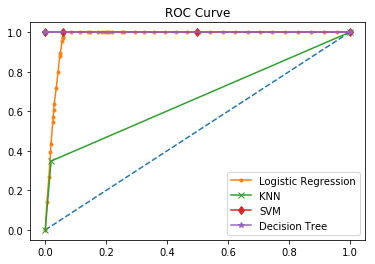

In [213]:
X_train, X_test, Y_train, Y_test = split(srchpg_X,srchpg_Y) 
log_reg(X_train,Y_train)
knn(X_train,Y_train)
svm(X_train,Y_train)
decision_tree(X_train,Y_train)
draw_roc()

From, the above ROC curve, it seems that logistic regression, Decision tree, SVM performs  good in this scenario. However, in this case data is heavily skewed;Hence it could benefit from k-fold cross validation

### Classification - Searchpage conversion

Logistic Regression Model : Accuracy of training: 0.866283185840708
K-nearest neighbour Model : Accuracy of training: 0.8168731563421829
SVM Model : Accuracy of training: 0.866283185840708
Decision Tree Model : Accuracy of training: 0.866283185840708


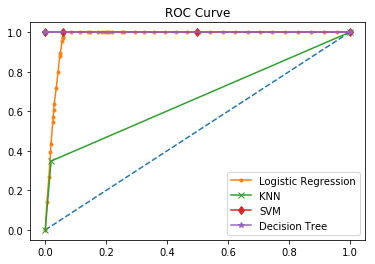

In [215]:
X_train, X_test, Y_train, Y_test = split(paymnt_X,paymnt_Y) 
log_reg(X_train,Y_train)
knn(X_train,Y_train)
svm(X_train,Y_train)
decision_tree(X_train,Y_train)
draw_roc()

From, the above ROC curve, it seems that logistic regression, Decision tree, SVM performs good in this scenario. However, in this case data is heavily skewed;Hence it could benefit from k-fold cross validation

# Classification - Payment confirmation conversion

Logistic Regression Model : Accuracy of training: 0.9274657231313578
K-nearest neighbour Model : Accuracy of training: 0.9274657231313578
SVM Model : Accuracy of training: 0.9274657231313578
Decision Tree Model : Accuracy of training: 0.9274657231313578


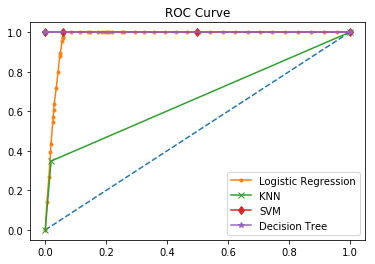

In [218]:
X_train, X_test, Y_train, Y_test = split(pymtcnf_X,pymtcnf_Y) 
log_reg(X_train,Y_train)
knn(X_train,Y_train)
svm(X_train,Y_train)
decision_tree(X_train,Y_train)
draw_roc()

From, the above ROC curve, it seems that logistic regression, Decision tree, SVM performs good in this scenario. However, in this case data is heavily skewed;Hence it could benefit from k-fold cross validation

# Clustering 

In [219]:
div = final_df.iloc[:,2:].copy('deep')
distribution = pd.pivot_table(final_df,values =["month","device","sex"],fill_value= 0,columns=["user_id"],aggfunc='sum')
distribution

user_id,17,28,37,38,55,72,112,136,139,158,...,999912,999913,999916,999919,999928,999934,999948,999957,999978,999979
device,0,0,1,1,0,0,1,0,0,0,...,0,1,0,1,1,1,0,1,0,0
month,4,4,2,3,2,4,3,3,2,4,...,4,2,3,4,1,4,2,4,4,3
sex,1,1,1,0,1,1,1,1,0,0,...,1,1,1,1,0,0,0,0,0,0


In [220]:
kmeans_df = distribution.transpose()
kmeans_df.head()

,device,month,sex
user_id,,,
17,0,4,1
28,0,4,1
37,1,2,1
38,1,3,0
55,0,2,1


#### Implement K-Means Algorithm

In [221]:

minClust = 2      # Hypothesized minimum number of segments
maxClust = 7      # Hypothesized maximum number of segments

#---List to hold cluster sets
k_means_res = list()
k_means_sse  = list()

result = pd.DataFrame(columns = ['Cluster','SSE']);

i=0

for folds in range(minClust,maxClust):
    km_model = KMeans(n_clusters=folds,random_state = 27).fit(kmeans_df)
    k_means_res.append(km_model)
    k_means_sse.append(k_means_res[i].inertia_)
    result.loc[i]= [folds,k_means_sse[i]]
    i=i+1
result.index = result.Cluster
result

,Cluster,SSE
Cluster,,
2.0,2.0,65310.636881
3.0,3.0,54009.247983
4.0,4.0,42709.825182
5.0,5.0,37716.331928
6.0,6.0,31990.028312


#### Use elbow method to determine the number of clusters
From the below plot we can infer that there are 4 ideal clusters

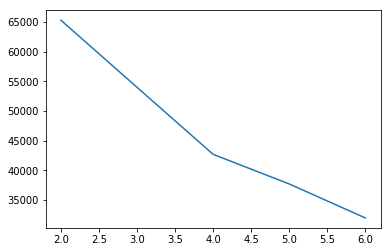

In [222]:
plt.plot(result.Cluster,result.SSE)

#### Display and Describe the customer segments

In [223]:
cluster_map = pd.DataFrame()
cluster_map['user_id'] = kmeans_df.index.values
cluster_map['cluster'] = k_means_res[2].labels_

#### Cluster 0

From below data, we can infer that cluster 0 comprises mostlu of <u>female</u> users who predominantly used <u>desktop</u> to reach <u>homepage</u> in <u>march and april</u>; Most of them seem to have abandoned the website at homepage; Perhaps they could have found the difficult to navigate further. Website design could be studied for any possible navigation difficulty  

In [224]:
pd.merge(cluster_map[cluster_map.cluster == 0].head(10),conv_df,on='user_id')


,user_id,cluster,date,device,sex,homepg,srchpg,paymtpg,paymtcnf
0,38,0,2015-03-23,Mobile,Female,1,1,1,0
1,158,0,2015-04-18,Desktop,Female,1,0,0,0
2,228,0,2015-04-01,Desktop,Female,1,0,0,0
3,257,0,2015-04-18,Desktop,Female,1,1,0,0
4,261,0,2015-04-09,Desktop,Female,1,0,0,0
5,294,0,2015-04-22,Desktop,Female,1,0,0,0
6,303,0,2015-04-14,Desktop,Female,1,0,0,0
7,348,0,2015-04-12,Mobile,Female,1,0,0,0
8,389,0,2015-03-12,Desktop,Female,1,0,0,0
9,395,0,2015-04-06,Desktop,Female,1,0,0,0


#### Cluster 1
From below data, we can infer that cluster 0 comprises of both <u>male and female</u> users who predominantly used <u>desktop</u> to reach homepage in </u>February</u>; Most of them seem to have goneforward to the searchpage and abandoned the website at search page. Perhaps they did not find the product that they were searching for or UI might have been difficult for them to navigate further. Further studies could be conducted to validate this hypothesis


In [225]:
pd.merge(cluster_map[cluster_map.cluster == 1].head(10),conv_df,on='user_id')


,user_id,cluster,date,device,sex,homepg,srchpg,paymtpg,paymtcnf
0,37,1,2015-02-21,Mobile,Male,1,1,0,0
1,55,1,2015-02-01,Desktop,Male,1,0,0,0
2,139,1,2015-02-05,Desktop,Female,1,0,0,0
3,214,1,2015-02-13,Desktop,Female,1,1,0,0
4,242,1,2015-02-11,Mobile,Male,1,1,0,0
5,270,1,2015-02-16,Desktop,Female,1,1,0,0
6,430,1,2015-02-07,Desktop,Male,1,1,0,0
7,504,1,2015-02-06,Desktop,Female,1,0,0,0
8,579,1,2015-02-22,Desktop,Male,1,1,0,0
9,585,1,2015-02-13,Desktop,Female,1,0,0,0


#### Cluster 2
From below data, we can infer that cluster 1 comprises of <u>Male</u> users who used both <u>desktop and mobile</u> to visit the <u>home page</u> in <u>March and april</u> and abondoned the website. Most of them seem to have abandoned the funnel at search page and observing the pattern, most of the customer were exiting the funnel from march onwards. We may study any changes occured in business or UI during March to validate the aforementioned hypothesis

In [226]:
pd.merge(cluster_map[cluster_map.cluster == 2].head(10),conv_df,on='user_id')


,user_id,cluster,date,device,sex,homepg,srchpg,paymtpg,paymtcnf
0,17,2,2015-04-21,Desktop,Male,1,1,0,0
1,28,2,2015-04-29,Desktop,Male,1,0,0,0
2,72,2,2015-04-22,Desktop,Male,1,0,0,0
3,112,2,2015-03-17,Mobile,Male,1,0,0,0
4,136,2,2015-03-28,Desktop,Male,1,0,0,0
5,198,2,2015-03-17,Mobile,Male,1,0,0,0
6,265,2,2015-03-21,Mobile,Male,1,0,0,0
7,307,2,2015-03-26,Mobile,Male,1,0,0,0
8,317,2,2015-04-30,Desktop,Male,1,1,0,0
9,411,2,2015-04-13,Desktop,Male,1,1,0,0


#### Cluster 3
From below data, we can infer that cluster 0 comprises of predominantly <u>male</u> users who used mostly <u>desktop</u> to visit the <u>homepage</u> in <u>January</u> and about half of them seem to have been converted 

In [227]:
pd.merge(cluster_map[cluster_map.cluster == 3].head(10),conv_df,on='user_id')


,user_id,cluster,date,device,sex,homepg,srchpg,paymtpg,paymtcnf
0,210,3,2015-01-22,Desktop,Male,1,1,0,0
1,212,3,2015-01-20,Desktop,Male,1,0,0,0
2,239,3,2015-01-05,Mobile,Male,1,1,0,0
3,278,3,2015-01-30,Desktop,Female,1,0,0,0
4,290,3,2015-01-18,Desktop,Female,1,0,0,0
5,365,3,2015-01-02,Desktop,Male,1,1,0,0
6,432,3,2015-01-05,Desktop,Male,1,0,0,0
7,459,3,2015-01-31,Mobile,Male,1,1,1,0
8,496,3,2015-01-19,Desktop,Female,1,0,0,0
9,515,3,2015-01-03,Mobile,Male,1,1,0,0


# Summary

452 users converted after hitting the homepage<BR>
January-2015 had maximum number of conversions:189

Distribution of users across pages:


,Page,visit
Page,,
Paymentconfirmationpage_Visit,Paymentconfirmationpage_Visit,452
Paymentpage_Visit,Paymentpage_Visit,6030
Searchpage_Visit,Searchpage_Visit,45200
Homepage_Visit,Homepage_Visit,90400


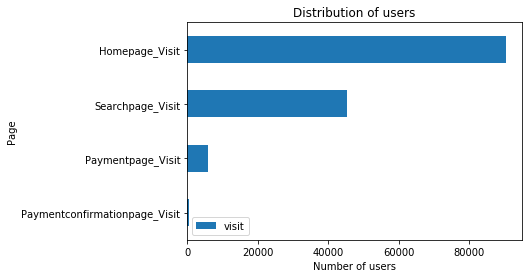

In [228]:
print("Distribution of users across pages:")
sls_funnel.plot.barh()
plt.title("Distribution of users")
plt.xlabel("Number of users")
sls_funnel